In [1]:
import do_functions as do
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')

In [2]:
df = do.read_and_merge('paz_metadata_actualitzat.pkl',
                       'paz_profiles_actualitzat.pkl')
df = do.clean_dataframe(df)

In [12]:
df.head(20)

,roid,lat,lon,startimeUTC,az_surf,meanP_2,precipBelow12,precipBelow6,irTemp_below,dphi_0010,...,h391,h392,h393,h394,h395,h396,h397,h398,h399,h400
0,PAZ1.2018.130.20.55.G18,37.48,126.10,2018-05-10 20:55:41,-30.59,0.00,0.001,0.000,236,-0.055016,...,0.657319,0.561302,0.453678,0.413606,0.423642,0.358429,0.313858,0.299540,0.329093,0.301198
1,PAZ1.2018.130.21.01.G19,4.68,153.15,2018-05-10 21:01:40,61.29,0.03,0.044,0.040,211,-0.017083,...,0.388286,0.376438,0.316907,0.303784,0.237429,0.229576,0.131511,0.020837,-0.010168,-0.107573
2,PAZ1.2018.130.21.10.G24,-16.88,135.77,2018-05-10 21:10:33,19.90,0.00,0.001,0.000,242,-0.065611,...,-0.096078,-0.092646,-0.021363,-0.009680,-0.004799,-0.060674,-0.032557,0.026656,0.083702,0.040231
3,PAZ1.2018.130.21.16.G10,-36.43,112.66,2018-05-10 21:16:14,-7.23,0.00,0.000,0.000,251,0.020166,...,-0.017869,-0.089222,-0.166217,-0.170754,-0.122106,-0.222287,-0.267388,-0.316209,-0.349521,-0.330845
4,PAZ1.2018.130.21.39.G29,-53.91,-64.58,2018-05-10 21:39:06,-147.99,0.01,0.004,0.002,228,0.030036,...,0.015577,0.010131,-0.007171,-0.013827,0.019190,0.006500,0.052092,0.063766,0.077721,0.111858
5,PAZ1.2018.130.21.42.G26,-41.63,-38.13,2018-05-10 21:42:11,142.88,0.05,0.010,0.021,226,0.559503,...,0.180887,0.165826,0.174311,0.126288,0.092670,0.041140,0.109162,0.078077,0.055858,0.030886
6,PAZ1.2018.130.21.48.G16,-16.66,-45.19,2018-05-10 21:48:45,145.50,0.00,0.000,0.000,274,0.187338,...,0.237454,0.269661,0.257756,0.196077,0.159746,0.141490,0.106908,0.097668,0.062152,0.053860
7,PAZ1.2018.130.21.53.G05,2.68,-74.44,2018-05-10 21:53:19,-147.75,0.09,0.260,0.141,212,1.047200,...,0.070712,-0.016555,-0.072364,-0.095486,-0.119496,-0.118196,-0.121083,-0.112930,-0.169992,-0.160990
8,PAZ1.2018.130.22.41.G12,-3.57,119.57,2018-05-10 22:41:29,33.49,0.07,0.040,0.082,224,0.485074,...,-0.117678,-0.073476,-0.065359,-0.044248,-0.028299,-0.065856,-0.060446,-0.104593,-0.029520,-0.037323
9,PAZ1.2018.130.22.48.G32,-26.07,105.10,2018-05-10 22:48:14,10.20,0.00,0.000,0.000,281,-0.949664,...,0.270236,0.221838,0.200191,0.198203,0.235245,0.271559,0.281925,0.322198,0.334929,0.287340


([<matplotlib.axis.YTick at 0x7fae04868400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

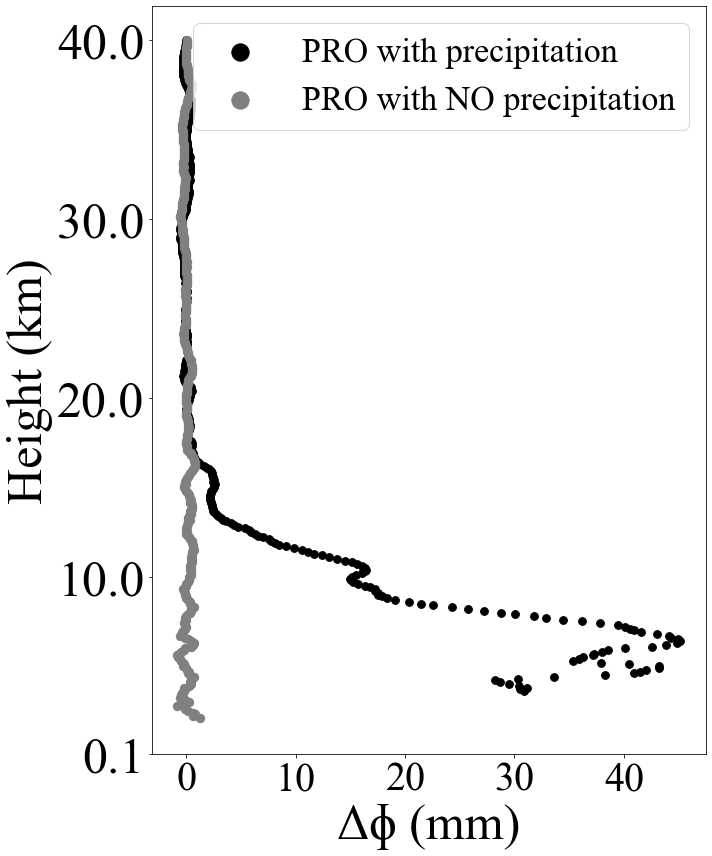

In [19]:
p = do.get_profile(df,321)
nop = do.get_profile(df,4)

h = np.linspace(0.1,40,400)


plt.figure(figsize=(10,12), tight_layout=True)

plt.scatter(p,h,label='PRO with precipitation',s=60,c='black')
plt.scatter(nop,h,label='PRO with NO precipitation',s=70,c='gray')

lgnd = plt.legend(scatterpoints=1,
                  prop= FontProperties(family='Times New Roman',style='normal', size=34))

lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]

plt.xlabel('Δɸ (mm)', 
           fontproperties=font,
           fontsize=50)
plt.ylabel('Height (km)',
           fontproperties=font,
           fontsize=50)

plt.xticks(fontproperties=font, 
           fontsize=40)
plt.yticks([0.1,10,20,30,40],
           fontproperties=font, 
           fontsize=50)


Text(0, 0.5, 'Height (km)')

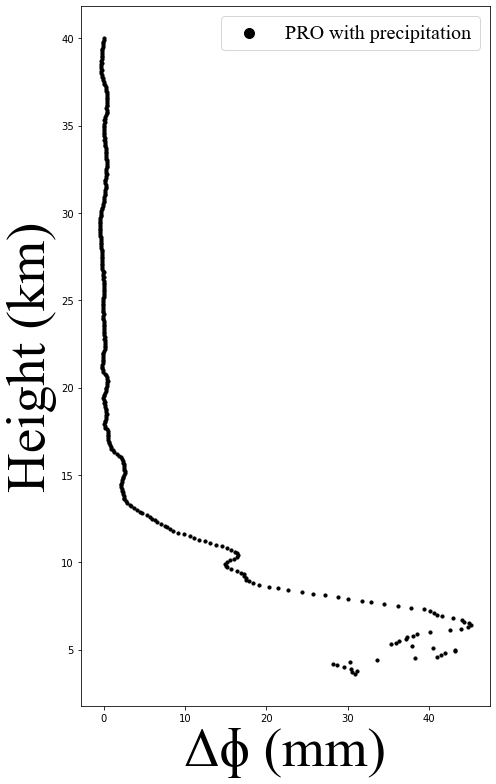

In [17]:
p = do.get_profile(df,331)
nop = do.get_profile(df,4)

h = np.linspace(0.1,40,400)


plt.figure(figsize=(7,11), tight_layout=True)

plt.scatter(p,h,label='PRO with precipitation',s=10,c='black')

lgnd = plt.legend(scatterpoints=1,
                  prop= FontProperties(family='Times New Roman',style='normal', size=20))

lgnd.legendHandles[0]._sizes = [100]


plt.xlabel('Δɸ (mm)', 
           fontproperties=font,
           fontsize=55)
plt.ylabel('Height (km)',
           fontproperties=font,
           fontsize=55)

